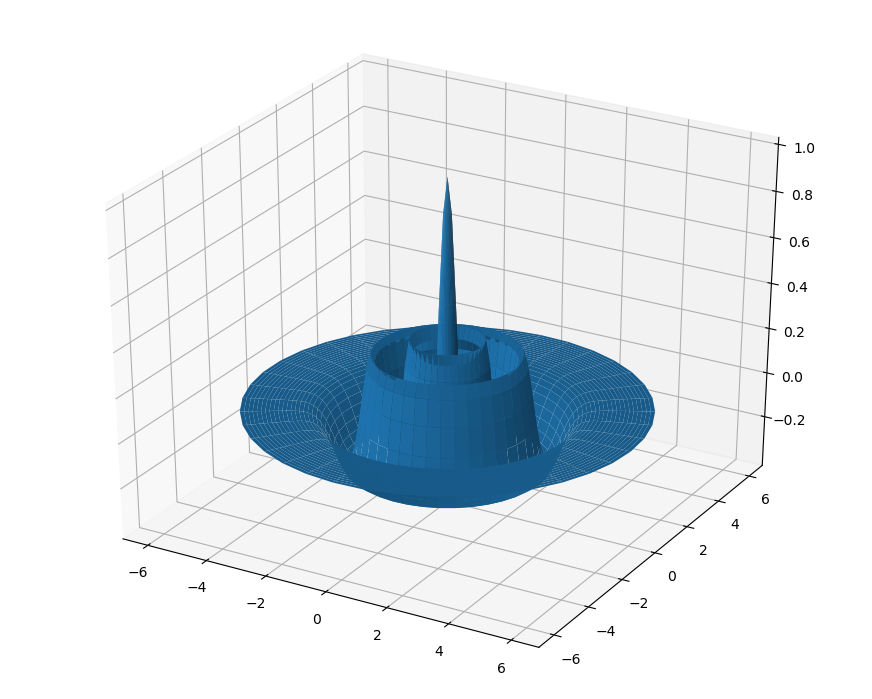

In [16]:
import numpy as np
from scipy.special import binom as binom 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import pyplot
plt = pyplot
from matplotlib import cm
import matplotlib

'''Define A_(pm)  (Gauss-laguerre polinomials) '''

def Ln(p,m,xj):
    Ln=0.
    for i in range(p+1):#el p+1 es por la indexacion
        Ln=Ln+((-1)**i)*binom(p+m,p-i)*(xj**i)/np.math.factorial(i)
    return Ln

def A(p, m, r, phi):#defino G-L

    A0=np.zeros((len(phi),len(r)))
    for j, rn in enumerate(r):
            A0[:,j]=np.exp(-rn**2)*Ln(p,0,2*rn**2)

    A1=np.zeros_like(A0)
    for j, rn in enumerate(r):
         for k, phin in enumerate(phi):
            A1[k,j]=2*((2*rn**2)**(m/2))*np.sqrt(np.math.factorial(p)/np.math.factorial(p+m))*np.exp(-rn**2)*Ln(p,m,2*(rn**2))*np.sin(m*phin)

    A2=np.zeros_like(A0)

    for j, rn in enumerate(r):
        for k, phin in enumerate(phi):
            A2[k,j]=2*(2*rn**2)**(m/2)*np.sqrt(np.math.factorial(p)/np.math.factorial(p+m))*np.exp(-rn**2)*Ln(p,m,2*rn**2)*np.cos(m*phin)


    return A0, A1, A2

pi=np.pi
r=np.linspace(0,6,50)
phi=np.linspace(0,2*pi,40)

A0, A1, A2=A(5,1,r,phi)#

fig = pyplot.figure(figsize=(11,9), dpi=100)
ax = pyplot.subplot(111, projection='3d')
R, P = np.meshgrid(r, phi)
X, Y = R*np.cos(P), R*np.sin(P)
ax.plot_surface(X, Y, A0)

#no sirvio para lo que se ocupaba

In [ ]:
def cilindricas(listax,listay):
    res_x = []
    res_y = []
    r = []
    phi = []
    
    for a in range(0, len(listax)):
        res_x.append(math.pow(listax[a],2))
    
    for b in range(0, len(listay)):
        res_y.append(math.pow(listay[b],2))
        
    for c in range(0, len(listax)):
        r.append(np.sqrt(res_x[c]+res_y[c]))
    
    for d in range(0, len(listax)):
        phi.append(math.atan(listay[d]/listax[d]))
    
    return r, phi

#no sirvio

Otra prueba

In [5]:
def guardar3DPlotROI2(FITS_dirPath, picosEnROI, sunCenter, pixRadius, prop):
    #Se obtienen las direcciones de los archivos FITS a gráficar
    fitsPaths= sorted(glob(str(FITS_dirPath)+'/*193.image_lev1.fits'))
    print (len(fitsPaths))
    
     # Se itera sobre cada archivo FITS del directorio
    for i in range(0, len(fitsPaths)):
        # Se crea objeto Map y se obtiene el centro(sunC) y radio(radiusSun) 
        # del disco solar de los metadatos 
        aiamapFITS_i = sunpy.map.Map(fitsPaths[i])
        propRadius = int(prop * pixRadius)    
        x = np.arange(aiamapFITS_i.data.shape[0])
        y = np.arange(aiamapFITS_i.data.shape[1])
        
        def cilindricas(listax,listay):
            res_x = []
            res_y = []
            r = []
            phi = []
    
            for a in range(0, len(listax)):
                res_x.append(math.pow(listax[a],2))
    
            for b in range(0, len(listay)):
                res_y.append(math.pow(listay[b],2))
        
            for c in range(0, len(listax)):
                r.append(np.sqrt(res_x[c]+res_y[c]))
    
            for d in range(0, len(listax)):
                phi.append(math.atan(listay[d]/listax[d]))
    
                return r, phi
    
        r, phi = cilindricas(x,y)
        R, Phi = np.meshgrid(r[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius)], phi[int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
        
    time_obs = str(aiamapFITS_i.meta['date-obs'])
    if('.84' in time_obs):  
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(R, Phi, aiamapFITS_i.data[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius), int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
        
#no sirvio

Otra prueba

AttributeError: 'list' object has no attribute 'ndim'

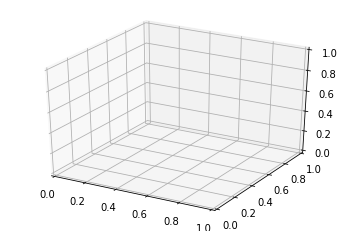

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


R = 2
u = np.linspace(0,  2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z)
fig.show()

#no sirve

In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

#usar la parte que grafica 2d en 3d 

<Figure size 640x480 with 1 Axes>

Otra prueba

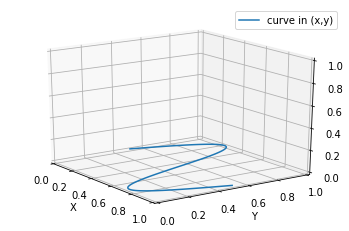

In [2]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

#si sirve graficar 2d en 3d

Otra prueba

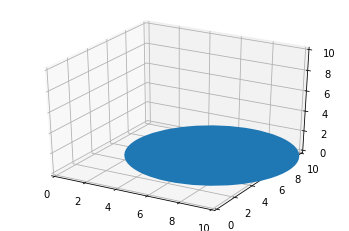

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((6, 7), 5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

#si se  puede delimitar y centrar un circulo

Otra idea

In [ ]:
if('.84' in time_obs):  
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')
        p = Circle((x[int(sunCenter[0])], y[int(sunCenter[1])]), propRadius)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")
        for i in range(0, len(X)):
            if X[i] < propRadius:
                ax.plot_surface(X, Y, aiamapFITS_i.data[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius), int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
                ax.set_zlim(0, 8000)    
                ax.view_init(elev=39, azim=64)
                peaks_pos = aiamapFITS_i.data[picosEnROI[:, 0], picosEnROI[:, 1]]
                ax.scatter(picosEnROI[:, 1], picosEnROI[:, 0], peaks_pos, color='r')
                ax.set_xlabel('X Coordinates')
                ax.set_ylabel('Y Coordinates')
                ax.set_zlabel('Intensity')
        
        plt.savefig('DatosJupyterSun/3D')   
#No sirvio

Otra idea

In [4]:
if('.84' in time_obs):  
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')
        p = Circle((x[int(sunCenter[0])], y[int(sunCenter[1])]), propRadius)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")
        
        def redux(lista):
            empty_lis = []
            for i in range(0,len(lista)):
                for j in range(0,len(lista)):
                    if lista[i][j] < propRadius:
                        empty_lis.append(lista[i][j])

            return empty_lis
        x1 = redux(X)
        y1 = redux(Y)
        X1, Y1 = np.meshgrid(x1[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius)], y1[int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
        ax.plot_surface(X1, Y1, aiamapFITS_i.data[int(sunCenter[0]), int(sunCenter[1])])
        
#no sirvio

NameError: name 'time_obs' is not defined

Otra prueba

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

data = np.arange(100).reshape(10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
im = ax.imshow(data)
poly = RegularPolygon([ 0.5,  0.5], 6, 0.4, fc='none', ec='k', transform=ax.transAxes)
im.set_clip_path(poly)
ax.add_patch(poly)
ax.axis('off')
plt.show()

#no sirvio

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [3]:
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
def guardar3DPlotROI2(FITS_dirPath, picosEnROI, sunCenter, pixRadius, prop):
    #Se obtienen las direcciones de los archivos FITS a gráficar
    fitsPaths= sorted(glob(str(FITS_dirPath)+'/*193.image_lev1.fits'))
    print (len(fitsPaths))
    
     # Se itera sobre cada archivo FITS del directorio
    for i in range(0, len(fitsPaths)):
        # Se crea objeto Map y se obtiene el centro(sunC) y radio(radiusSun) 
        # del disco solar de los metadatos 
        aiamapFITS_i = sunpy.map.Map(fitsPaths[i])
        propRadius = int(prop * pixRadius)
        x = np.arange(aiamapFITS_i.data.shape[0])
        y = np.arange(aiamapFITS_i.data.shape[1])
        X, Y = np.meshgrid(x[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius)], y[int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
    
    def redux(lista):
        res = []
        for i in range(0,len(lista)):
            for j in range(0,len(lista)):
                if lista[i][j] < propRadius:
                    res.append(lista[i][j])
                    
    x1 = redux(X)
    y1 = redux(Y)
    X1, Y1 = np.meshgrid(x1[int(sunCenter[0])], y1[int(sunCenter[1])])
    
    time_obs = str(aiamapFITS_i.meta['date-obs'])
    if('.84' in time_obs):  
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')
        p = Circle((x[int(sunCenter[0])], y[int(sunCenter[1])]), propRadius)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")
        ax.plot_surface(X1, Y1, aiamapFITS_i.data[int(sunCenter[0]), int(sunCenter[1])])
        ax.set_zlim(0, 8000)    
        ax.view_init(elev=39, azim=64)
        peaks_pos = aiamapFITS_i.data[picosEnROI[:, 0], picosEnROI[:, 1]]
        ax.scatter(picosEnROI[:, 1], picosEnROI[:, 0], peaks_pos, color='r')
        ax.set_xlabel('X Coordinates')
        ax.set_ylabel('Y Coordinates')
        ax.set_zlabel('Intensity')
        
        plt.savefig('DatosJupyterSun/3D')
        #plt.close(fig)  

In [ ]:
from matplotlib.patches import Circle, PathPatch
def guardar3DPlotROI2(FITS_dirPath, picosEnROI, sunCenter, pixRadius, prop):
    import mpl_toolkits.mplot3d.art3d as art3d
    #Se obtienen las direcciones de los archivos FITS a gráficar
    fitsPaths= sorted(glob(str(FITS_dirPath)+'/*193.image_lev1.fits'))
    print (len(fitsPaths))
    
     # Se itera sobre cada archivo FITS del directorio
    for i in range(0, len(fitsPaths)):
        # Se crea objeto Map y se obtiene el centro(sunC) y radio(radiusSun) 
        # del disco solar de los metadatos 
        aiamapFITS_i = sunpy.map.Map(fitsPaths[i])
        propRadius = int(prop * pixRadius)
        x = np.arange(aiamapFITS_i.data.shape[0])
        y = np.arange(aiamapFITS_i.data.shape[1])
        X, Y = np.meshgrid(x[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius)], y[int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])    
                        
    time_obs = str(aiamapFITS_i.meta['date-obs'])
    if('.84' in time_obs):  
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')
        p = Circle((x[int(sunCenter[0])], y[int(sunCenter[1])]), propRadius)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")
        ax.plot_surface(X, Y, aiamapFITS_i.data[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius), int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
        ax.set_zlim(0, 8000)    
        ax.view_init(elev=39, azim=64)
        peaks_pos = aiamapFITS_i.data[picosEnROI[:, 0], picosEnROI[:, 1]]
        ax.scatter(picosEnROI[:, 1], picosEnROI[:, 0], peaks_pos, color='r')
        ax.set_xlabel('X Coordinates')
        ax.set_ylabel('Y Coordinates')
        ax.set_zlabel('Intensity')
        
        plt.savefig('DatosJupyterSun/3D')
        #plt.close(fig)  

(10, 20)
[[3.31170381e-01 8.65140083e-01 1.21778348e-01 9.43145311e-01
  2.56320141e-01 9.54792271e-02 7.96878469e-01 1.44097435e-01
  9.42182903e-01 5.83062983e-01 4.55260754e-01 3.51743899e-01
  4.82760179e-01 9.35930361e-01 1.11772380e-01 1.65377786e-02
  4.91986628e-01 8.85448295e-01 5.86832428e-02 8.89050188e-01]
 [9.85811919e-01 6.87056934e-01 1.80309037e-01 7.22966494e-01
  5.04703120e-01 1.55223735e-01 4.73884865e-01 3.95138686e-01
  7.30028626e-01 1.68841621e-01 9.07719959e-01 6.29362610e-01
  5.00646050e-01 6.41789676e-01 6.32624956e-01 4.11200972e-01
  7.57239283e-01 3.40137963e-01 2.69046894e-01 5.13208829e-01]
 [1.21322179e-01 6.88648733e-02 1.15490914e-02 2.78950360e-01
  7.72884335e-02 3.31364152e-01 8.09063551e-01 8.41513133e-01
  4.81592173e-01 8.15845122e-01 5.67174632e-01 9.32239546e-01
  6.00784274e-01 5.98387911e-01 3.89806623e-01 8.03984733e-01
  4.28962604e-02 1.31310876e-01 7.80724236e-01 2.54117789e-01]
 [8.40308257e-01 6.82251875e-01 8.15479888e-01 5.21979067e

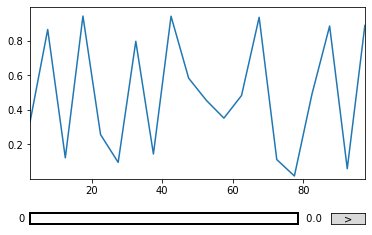

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sunpy.visualization.animator import LineAnimator

data_shape0 = (10, 20)
data0 = np.random.rand(*data_shape0)

print(data_shape0)
print(data0)
print(len(data0),len(data0[:,1]))

plot_axis0 = 1
slider_axis0 = 0

xdata = np.tile(np.linspace(0, 100, (data_shape0[plot_axis0] + 1)), (data_shape0[slider_axis0], 1))

ani = LineAnimator(data0, plot_axis_index=plot_axis0, axis_ranges=[None, xdata])

Intento de cinlindricas

In [ ]:
def guardar3DPlotROI2(FITS_dirPath, picosEnROI, sunCenter, pixRadius, prop):
    #Se obtienen las direcciones de los archivos FITS a gráficar
    fitsPaths= sorted(glob(str(FITS_dirPath)+'/*193.image_lev1.fits'))
    print (len(fitsPaths))
    
     # Se itera sobre cada archivo FITS del directorio
    for i in range(0, len(fitsPaths)):
        # Se crea objeto Map y se obtiene el centro(sunC) y radio(radiusSun) 
        # del disco solar de los metadatos 
        aiamapFITS_i = sunpy.map.Map(fitsPaths[i])
        propRadius = int(prop * pixRadius)    
        x = np.arange(aiamapFITS_i.data.shape[0])
        y = np.arange(aiamapFITS_i.data.shape[1])
        
    def cilindricas(listax,listay):
        res_x = []
        res_y = []
        r = []
        phi = []
    
        for a in range(0, len(listax)):
            res_x.append(math.pow(listax[a],2))
        for b in range(0, len(listay)):
            res_y.append(math.pow(listay[b],2))
        for c in range(0, len(listax)):
            r.append(np.sqrt(res_x[c]+res_y[c]))
        for d in range(0, len(listax)):
            phi.append(np.arctan(listay[d]/listax[d]))
    
        return r, phi
    
    r, phi = cilindricas(x,y)
    R, Phi = np.meshgrid(r[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius)], phi[int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
    
    time_obs = str(aiamapFITS_i.meta['date-obs'])
    if('.84' in time_obs):  
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(R, Phi, aiamapFITS_i.data[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius), int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
        ax.set_zlim(0, 8000)    
        ax.view_init(elev=39, azim=64)
        peaks_pos = aiamapFITS_i.data[picosEnROI[:, 0], picosEnROI[:, 1]]
        ax.scatter(picosEnROI[:, 1], picosEnROI[:, 0], peaks_pos, color='r')
        ax.set_xlabel('X Coordinates')
        ax.set_ylabel('Y Coordinates')
        ax.set_zlabel('Intensity')
        
        plt.savefig('DatosJupyterSun/3D')

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import peak_local_max

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE

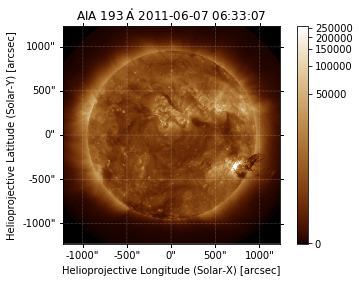

In [2]:
aiamap = sunpy.map.Map(AIA_193_IMAGE)
plt.figure()
aiamap.plot()
plt.colorbar()

Text(0.5, 0, 'Intensity')

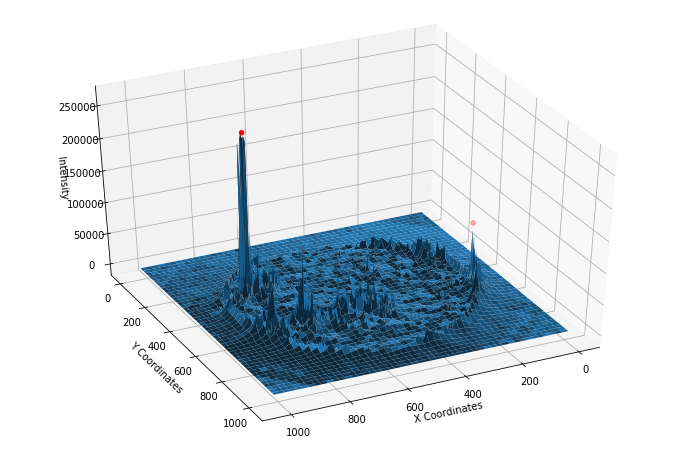

In [4]:
x = np.arange(aiamap.data.shape[0])
y = np.arange(aiamap.data.shape[1])
X, Y = np.meshgrid(x, y)

coordinates = peak_local_max(aiamap.data, min_distance=60, threshold_rel=0.2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, aiamap.data)
ax.view_init(elev=39, azim=64)
peaks_pos = aiamap.data[coordinates[:, 0], coordinates[:, 1]]
ax.scatter(coordinates[:, 1], coordinates[:, 0], peaks_pos, color='r')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Intensity')

TypeError: only size-1 arrays can be converted to Python scalars

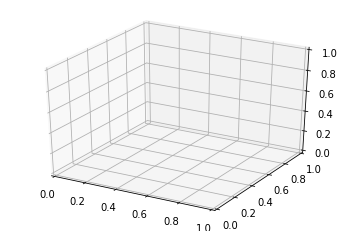

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=np.linspace(-1, 1, 100)
z=np.linspace(-2, 2, 100)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)

rstride = 20
cstride = 10
ax.plot_surface(Xc, Yc, Zc)
ax.plot_surface(Xc, -Yc, Zc)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()